In [1]:
import json
import string
import nltk
import os
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
folder_path = r"C:\Users\hp\OneDrive\Desktop\NLP_3\data"

# Construct the file paths
train_file_path = os.path.join(folder_path, "train_data.json")
test_file_path = os.path.join(folder_path, "test_data.json")

# Read the training data
with open(train_file_path, 'r', encoding='utf-8') as train_file:
    train_data = json.load(train_file)

# Read the test data
with open(test_file_path, 'r', encoding='utf-8') as test_file:
    test_data = json.load(test_file)

In [3]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Initialize Porter's Stemmer and stopwords
porter = PorterStemmer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
def extract_documents_and_labels(data):
    documents = []
    labels = []
    for label, docs in data.items():
        for doc in docs:
            documents.append(doc)
            labels.append(label)

    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Fit label encoder and transform labels
    encoded_labels = label_encoder.fit_transform(labels)

    return documents, encoded_labels

In [5]:
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Lowercase
    tokens = [token.lower() for token in tokens]
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    # Stemming
    tokens = [porter.stem(token) for token in tokens]
    
    return tokens

In [6]:
def preprocess_data(data):
    preprocessed_data = {}
    corpus = []
    vocabulary_set = set()
    
    for class_name, class_documents in data.items():
        class_data = {}
        for doc_number, doc_content in class_documents.items():
            preprocessed_text = preprocess_text(doc_content)
            class_data[doc_number] = preprocessed_text
            corpus.append(" ".join(preprocessed_text))
            vocabulary_set.update(preprocessed_text)
        preprocessed_data[class_name] = class_data
    
    return preprocessed_data, corpus, vocabulary_set

In [7]:
train_documents, train_labels = extract_documents_and_labels(train_data)
test_documents, test_labels = extract_documents_and_labels(test_data)

In [8]:
preprocessed_train_data, train_corpus, train_vocabulary_set = preprocess_data(train_data)
preprocessed_test_data, test_corpus, _ = preprocess_data(test_data)  # Ignore the test_vocabulary_set

In [9]:
# Initialize TF-IDF vectorizer with the vocabulary set obtained from the training data
vectorizer = TfidfVectorizer(vocabulary=train_vocabulary_set)
# Fit and transform the train and test corpora separately using the same vectorizer
X_train = vectorizer.fit_transform(train_corpus)
X_test = vectorizer.transform(test_corpus)

In [10]:
print("TF-IDF Matrix Shape_train:", X_train.shape)
print("TF-IDF Matrix Shape_test:", X_test.shape)

TF-IDF Matrix Shape_train: (11413, 39826)
TF-IDF Matrix Shape_test: (4024, 39826)


In [11]:
def evaluate_classifier(classifier, X_train, train_labels, X_test, test_labels, classifier_name):
    classifier.fit(X_train, train_labels)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(test_labels, y_pred)
    f1_macro = f1_score(test_labels, y_pred, average='macro')
    print(f"Evaluation results for {classifier_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Macro-averaged F1-score: {f1_macro:.4f}")
    return accuracy, f1_macro

In [12]:
def fit_classifier(classifier, X_train, train_labels):
    classifier.fit(X_train, train_labels)

In [13]:
def predict_labels(classifier, X_test):
    return classifier.predict(X_test)

In [14]:
def evaluate_score(test_labels, y_pred):
    accuracy = accuracy_score(test_labels, y_pred)
    f1_macro = f1_score(test_labels, y_pred, average='macro')
    return accuracy, f1_macro

In [15]:
def evaluate_classifier(classifier, X_train, train_labels, X_test, test_labels, classifier_name):
    fit_classifier(classifier, X_train, train_labels)
    y_pred = predict_labels(classifier, X_test)
    accuracy, f1_macro = evaluate_score(test_labels, y_pred)
    print(f"Evaluation results for {classifier_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Macro-averaged F1-score: {f1_macro:.4f}")
    return accuracy, f1_macro

In [16]:
# Fit MultinomialNB
nb_classifier = MultinomialNB()
fit_classifier(nb_classifier, X_train, train_labels)
print("MultinomialNB fitting done.")

MultinomialNB fitting done.


In [17]:
# Evaluate MultinomialNB
y_pred_nb = predict_labels(nb_classifier, X_test)
accuracy_nb, f1_macro_nb = evaluate_score(test_labels, y_pred_nb)
print(f"Evaluation results for MultinomialNB:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Macro-averaged F1-score: {f1_macro_nb:.4f}")
print("MultinomialNB evaluation done.\n")

Evaluation results for MultinomialNB:
Accuracy: 0.4955
Macro-averaged F1-score: 0.0322
MultinomialNB evaluation done.



In [18]:
# Fit SVC
svc_classifier = SVC(kernel='linear', C=1.0, probability=True)
fit_classifier(svc_classifier, X_train, train_labels)
print("SVC fitting done.")


KeyboardInterrupt



In [ ]:
# Evaluate SVC
y_pred_svc = predict_labels(svc_classifier, X_test)
accuracy_svc, f1_macro_svc = evaluate_score(test_labels, y_pred_svc)
print(f"\nEvaluation results for SVC:")
print(f"Accuracy: {accuracy_svc:.4f}")
print(f"Macro-averaged F1-score: {f1_macro_svc:.4f}")
print("SVC evaluation done.")


Evaluation results for SVC:
Accuracy: 0.7517
Macro-averaged F1-score: 0.3237
SVC evaluation done.


In [ ]:
# Fit Logistic Regression
logistic_classifier = LogisticRegression()
fit_classifier(logistic_classifier, X_train, train_labels)
print("Logistic Regression fitting done.")

Logistic Regression fitting done.


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Evaluate Logistic Regression
y_pred_logistic = predict_labels(logistic_classifier, X_test)
accuracy_logistic, f1_macro_logistic = evaluate_score(test_labels, y_pred_logistic)
print(f"Evaluation results for Logistic Regression:")
print(f"Accuracy: {accuracy_logistic:.4f}")
print(f"Macro-averaged F1-score: {f1_macro_logistic:.4f}")
print("Logistic Regression evaluation done.")

Evaluation results for Logistic Regression:
Accuracy: 0.7162
Macro-averaged F1-score: 0.2244
Logistic Regression evaluation done.


In [ ]:
def plot_scores(accuracies, f1_macros, models):
    # Plotting accuracies
    plt.figure(figsize=(10, 5))
    plt.bar(models, accuracies, color='skyblue')
    plt.title('Model Accuracies')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  # Setting y-axis limit to 0-1
    plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
    plt.show()

    # Plotting F1 macro scores
    plt.figure(figsize=(10, 5))
    plt.bar(models, f1_macros, color='lightgreen')
    plt.title('Model F1 Macro Scores')
    plt.xlabel('Models')
    plt.ylabel('F1 Macro Score')
    plt.ylim(0, 1)  # Setting y-axis limit to 0-1
    plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
    plt.show()

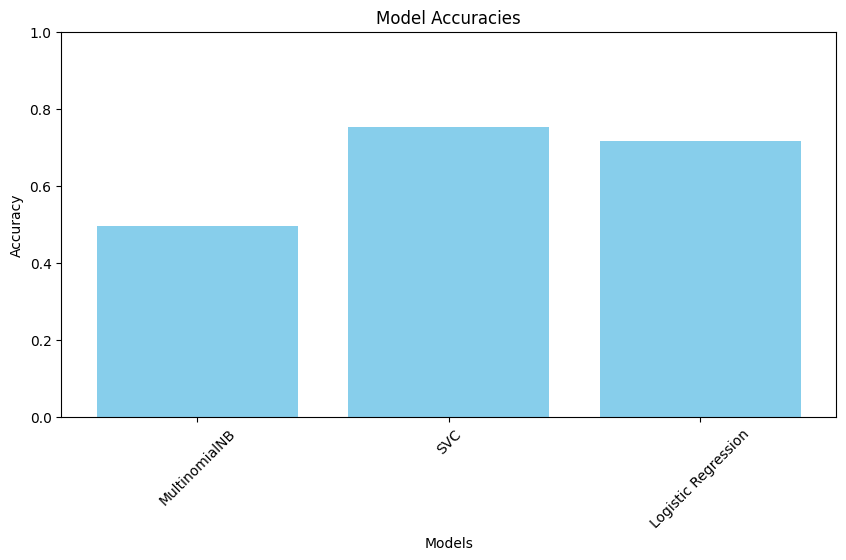

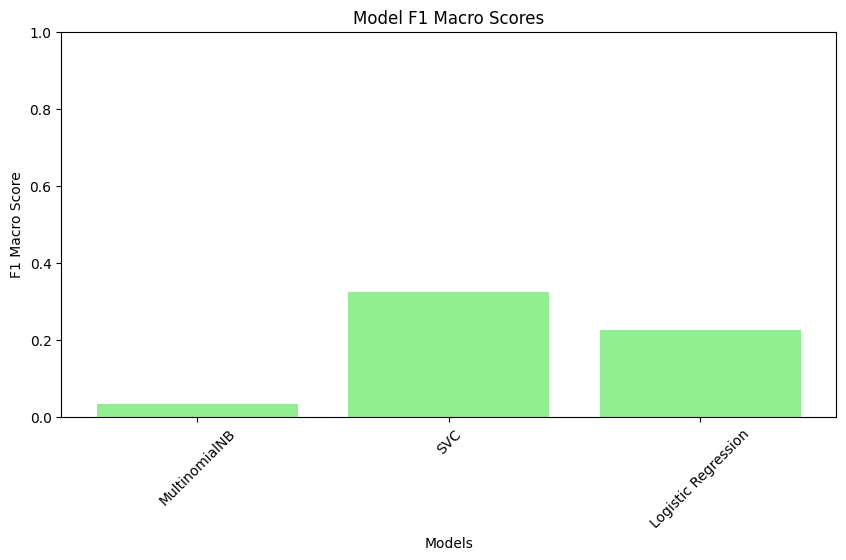

In [ ]:
accuracies = [accuracy_nb, accuracy_svc, accuracy_logistic]
f1_macros = [f1_macro_nb, f1_macro_svc, f1_macro_logistic]
models = ['MultinomialNB', 'SVC', 'Logistic Regression']

plot_scores(accuracies, f1_macros, models)

In [ ]:
# Save the preprocessed data as a JSON file
with open("preprocessed_train_data.json", 'w') as json_file:
    json.dump(preprocessed_train_data, json_file, indent=4)
    # Save the preprocessed data as a JSON file
with open("preprocessed_test_data.json", 'w') as json_file:
    json.dump(preprocessed_test_data, json_file, indent=4)